In [141]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, AffinityPropagation
from scipy.cluster.hierarchy import dendrogram, linkage



In [142]:
# Load your dataset
df = pd.read_csv("Customer_Data.csv")

In [143]:
df

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES   
0     C10001    40.900749           0.818182      95.40              0.00  \
1     C10002  3202.467416           0.909091       0.00              0.00   
2     C10003  2495.148862           1.000000     773.17            773.17   
3     C10004  1666.670542           0.636364    1499.00           1499.00   
4     C10005   817.714335           1.000000      16.00             16.00   
...      ...          ...                ...        ...               ...   
8945  C19186    28.493517           1.000000     291.12              0.00   
8946  C19187    19.183215           1.000000     300.00              0.00   
8947  C19188    23.398673           0.833333     144.40              0.00   
8948  C19189    13.457564           0.833333       0.00              0.00   
8949  C19190   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY   
0                      95.40      0.000000             0.166667  \
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY   
0                       0.000000                          0.083333  \
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT   
0                   0.000000                 0              2        1000.0  \
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0      201.802084        139.509787          0.000000      12  
1     4103.032597       1072.340217          0.222222      12  
2      622.066742        627.284787          0.000000      12  
3        0.000000               NaN          0.000000      12  
4      678.334763        244.791237          0.000000      12  
...           ...               ...               ...     ...  
8945   325.594462         48.886365  

# Data Pre-processing


In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [145]:
df.dropna(inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8636 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8636 non-null   object 
 1   BALANCE                           8636 non-null   float64
 2   BALANCE_FREQUENCY                 8636 non-null   float64
 3   PURCHASES                         8636 non-null   float64
 4   ONEOFF_PURCHASES                  8636 non-null   float64
 5   INSTALLMENTS_PURCHASES            8636 non-null   float64
 6   CASH_ADVANCE                      8636 non-null   float64
 7   PURCHASES_FREQUENCY               8636 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8636 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8636 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8636 non-null   float64
 11  CASH_ADVANCE_TRX                  8636 non-null   int64  
 12  PURCHASES_T

In [146]:
df.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES   
count   8636.000000        8636.000000   8636.000000       8636.000000  \
mean    1601.224893           0.895035   1025.433874        604.901438   
std     2095.571300           0.207697   2167.107984       1684.307803   
min        0.000000           0.000000      0.000000          0.000000   
25%      148.095189           0.909091     43.367500          0.000000   
50%      916.855459           1.000000    375.405000         44.995000   
75%     2105.195853           1.000000   1145.980000        599.100000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY   
count             8636.000000   8636.000000          8636.000000  \
mean               420.843533    994.175523             0.496000   
std                917.245182   2121.458303             0.401273   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 94.785000      0.000000             0.500000   
75%                484.147500   1132.385490             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY   
count                 8636.000000                       8636.000000  \
mean                     0.205909                          0.368820   
std                      0.300054                          0.398093   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.333333                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT   
count             8636.000000       8636.000000    8636.000000   8636.000000  \
mean                 0.137604          3.313918      15.033233   4522.091030   
std                  0.201791          6.912506      25.180468   3659.240379   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.250000          4.000000      18.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8636.000000       8636.000000       8636.000000  8636.000000  
mean    1784.478099        864.304943          0.159304    11.534391  
std     2909.810090       2372.566350          0.296271     1.310984  
min        0.049513          0.019163          0.000000     6.000000  
25%      418.559237        169.163545          0.000000    12.000000  
50%      896.675701        312.452292          0.000000    12.000000  
75%     1951.142090        825.496463          0.166667    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

In [147]:
df.drop(columns='CUST_ID', inplace=True)

In [148]:
scaler = StandardScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns) 

For Data pre-processing:
1. The amount of data that is missing is 314 rows which is 3.5% of the entire data so instead of manual inputs the rows were dropped.
2. The CUST_ID column was dropped because it is not needed in the Clustering analysis.
3. The data is all numerical in nature as categories are already mapped with representative numeric values. Standard scaler was applied to standardize the scales of all the columns. This will also help in making interpretable/comparable cluster summaries.

# EDA

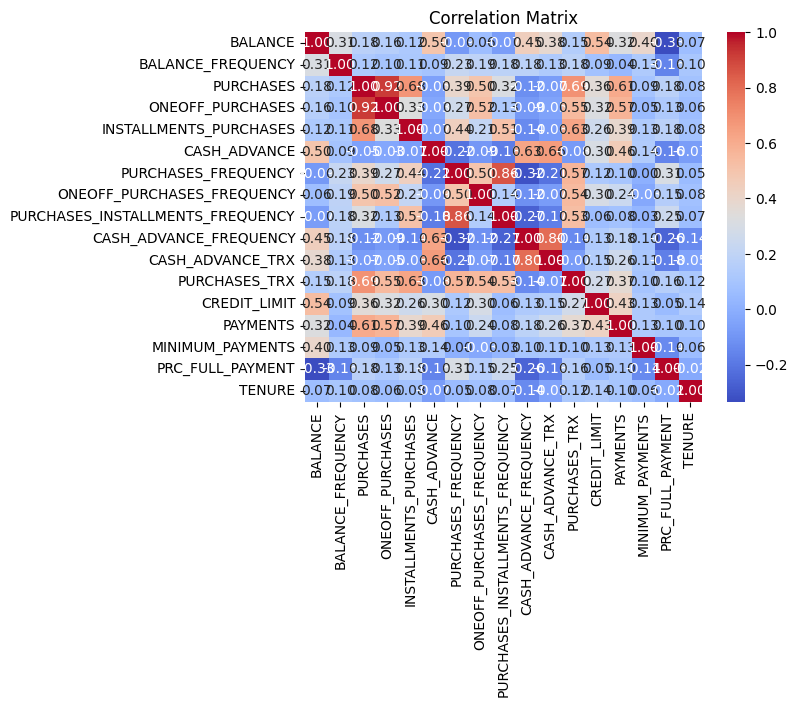

In [149]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

The heatmap shows that Balance has a high positive correlation with Credit Limit, Payments, Minimum Payments, Cash Adance, Cash Advance Frequency and Cash Advance TRX. This means that a higher balance will result in more responsible and upfront payments. Balance seems to be an important factor.

Tenure does not seem to show any specific relation with other variables so it might be less impactful in the clustering analysis.

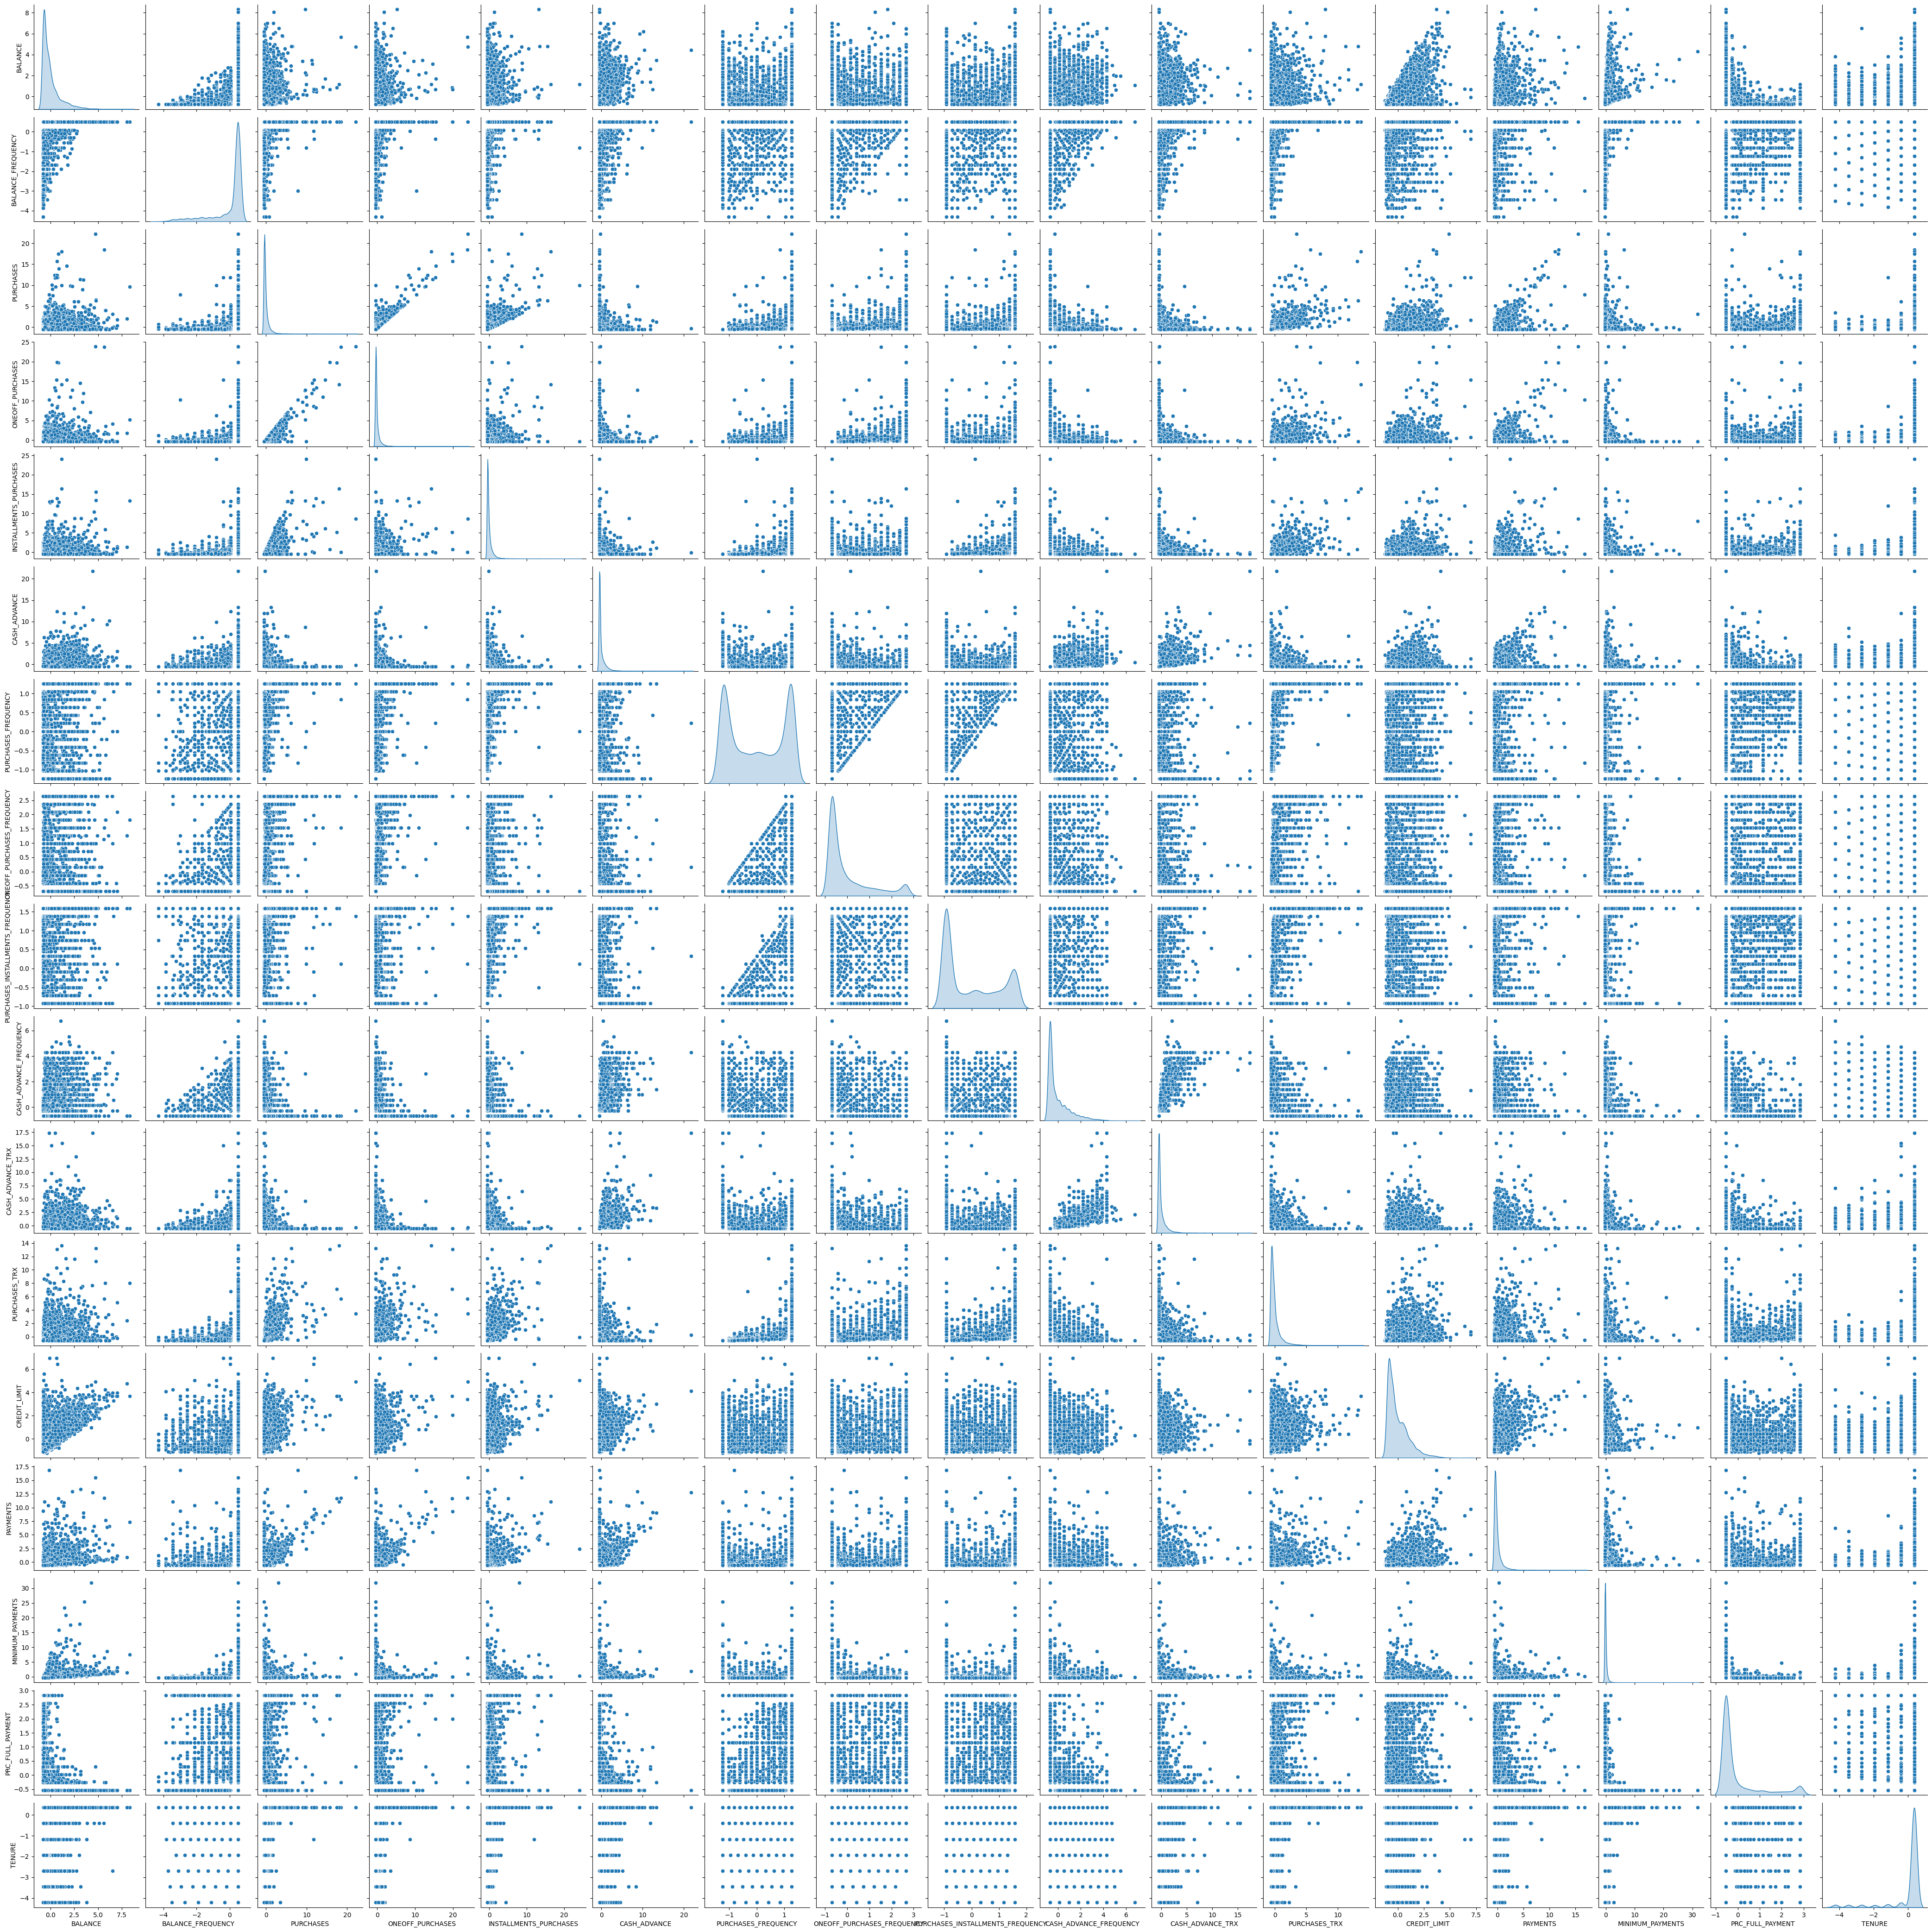

In [150]:
sns.pairplot(df, diag_kind='kde')
plt.show()

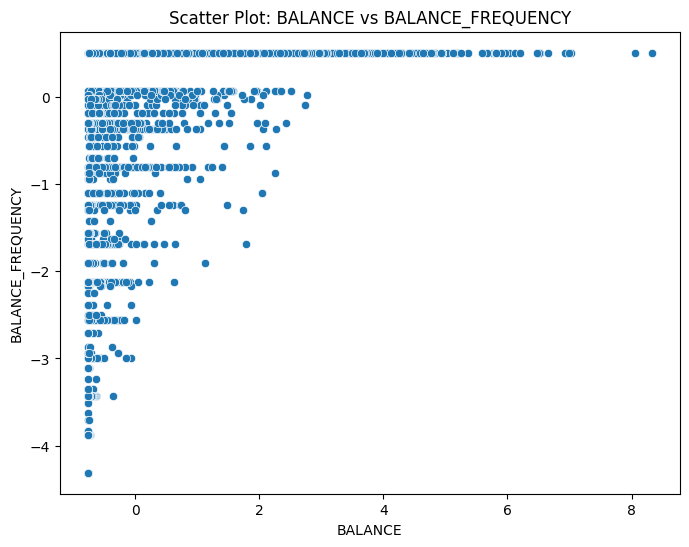

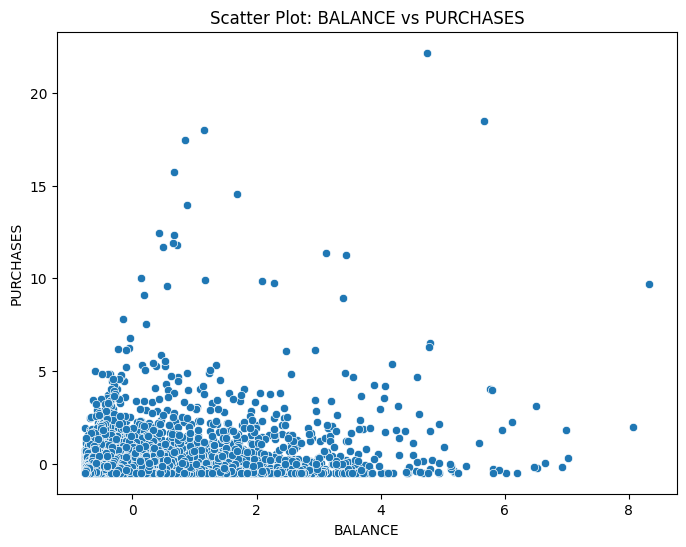

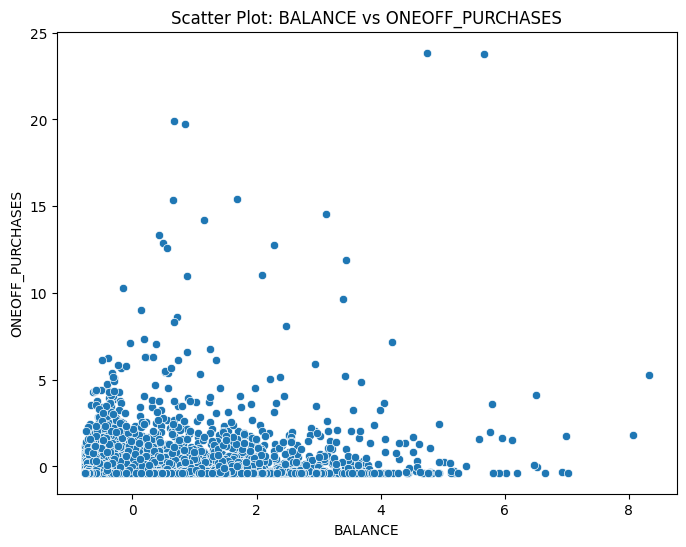

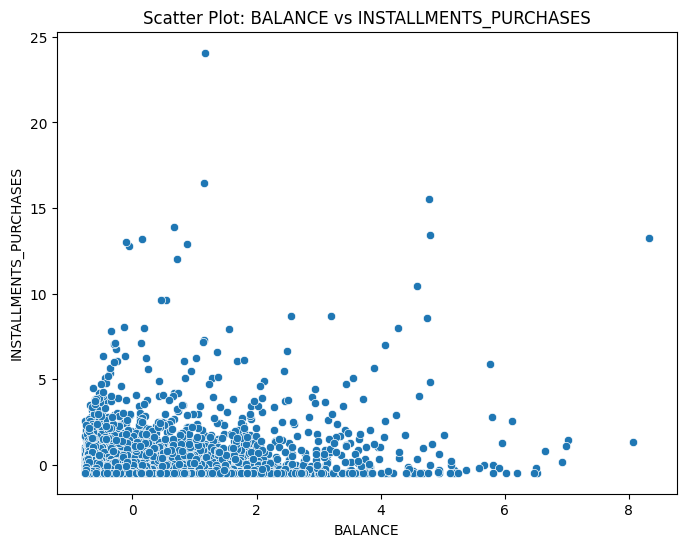

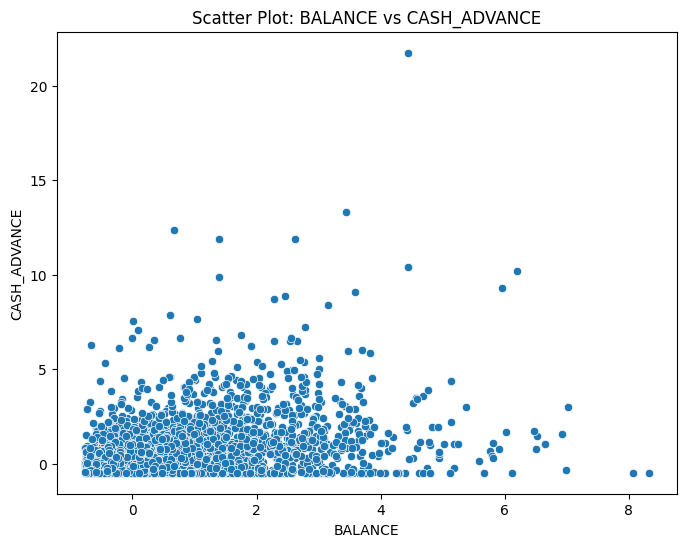

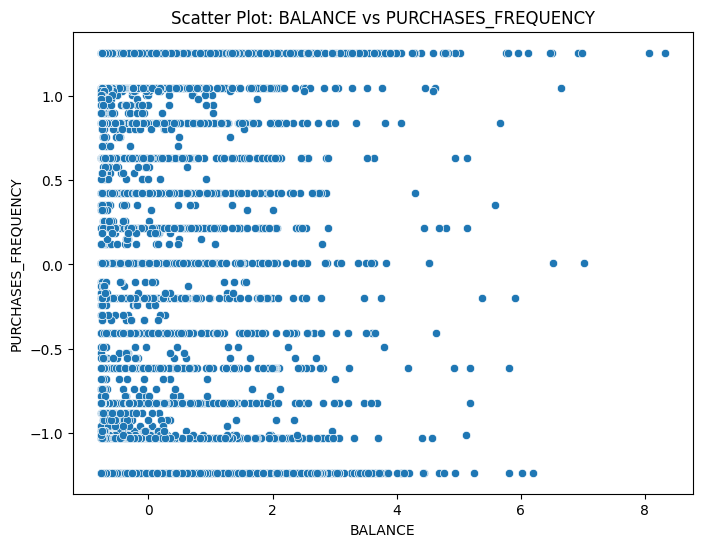

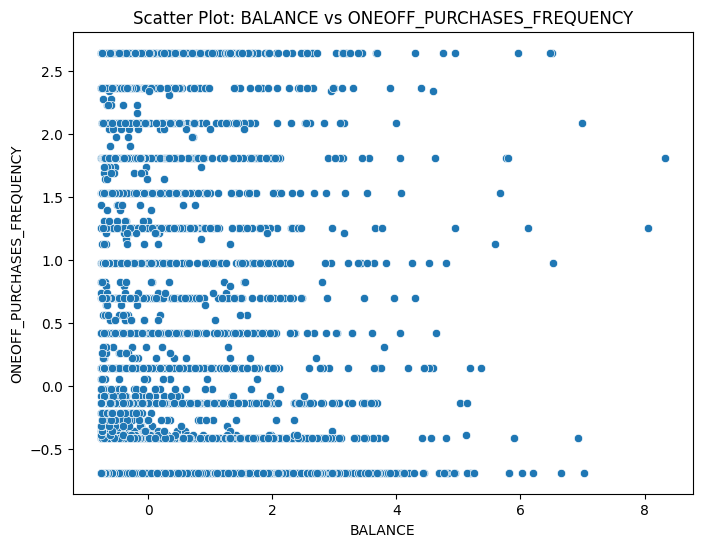

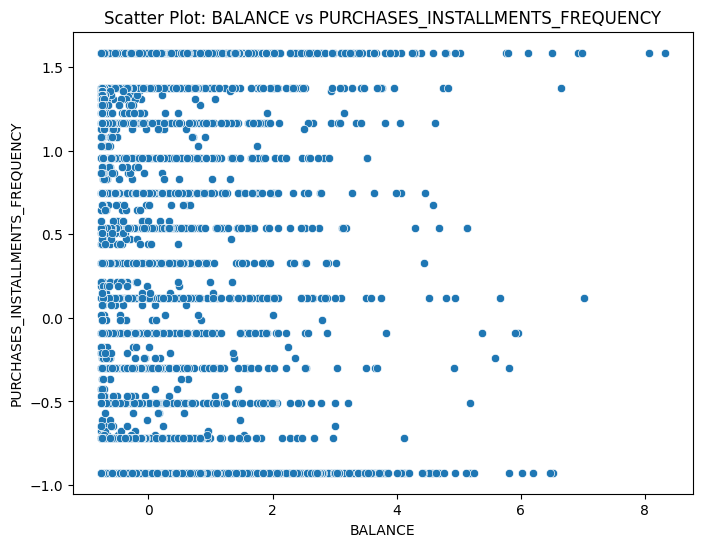

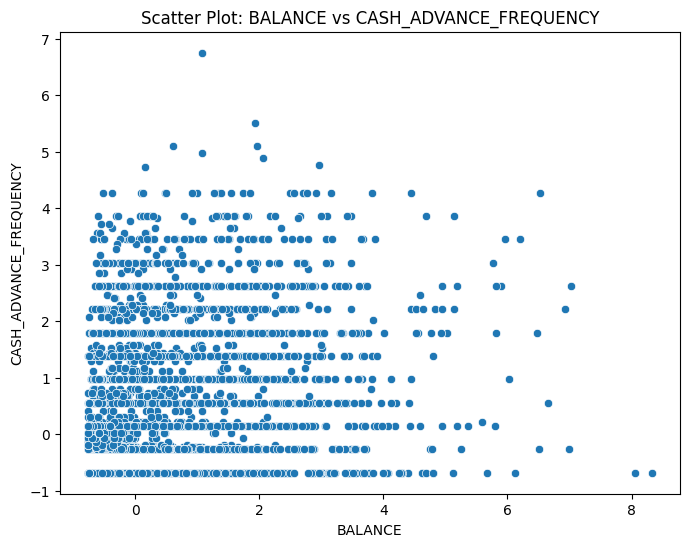

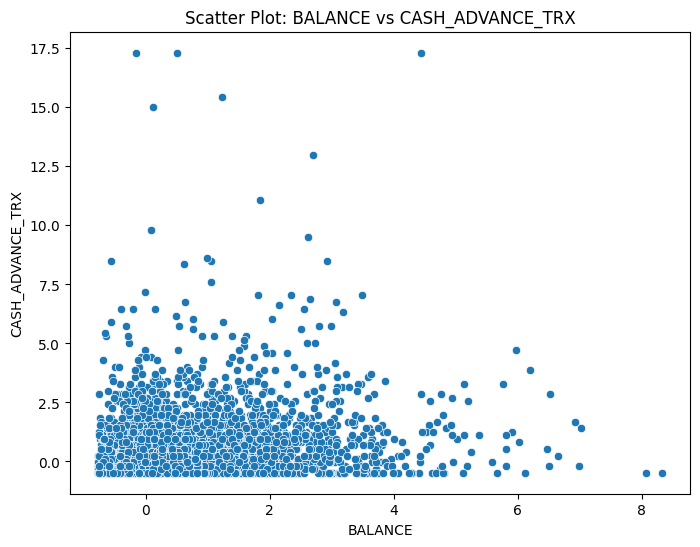

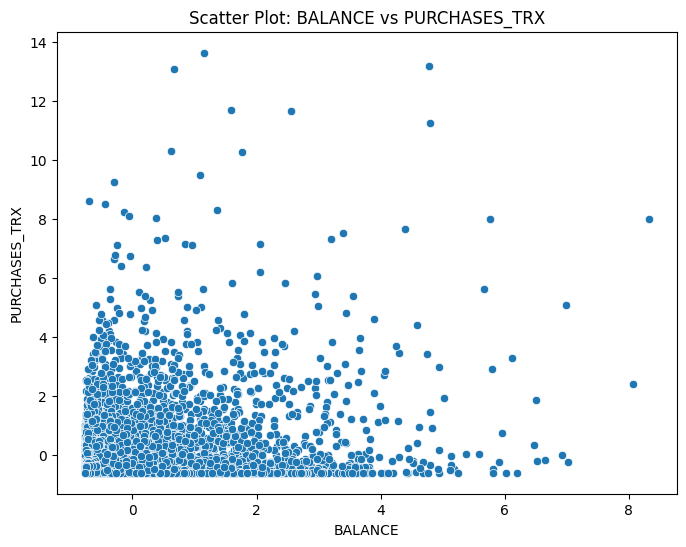

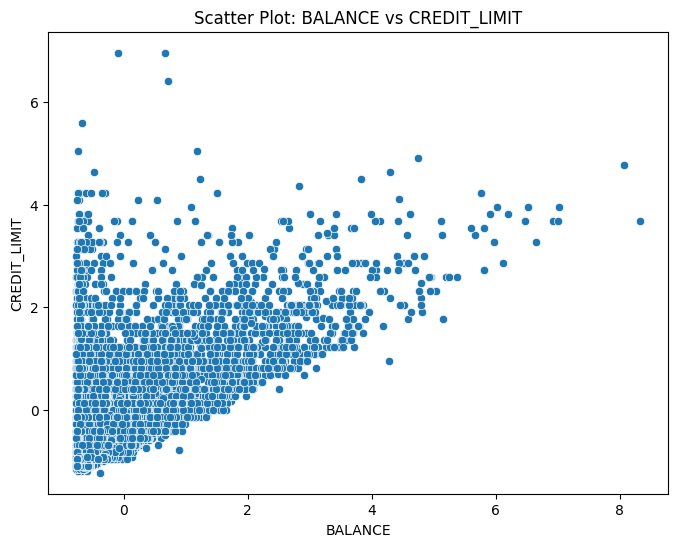

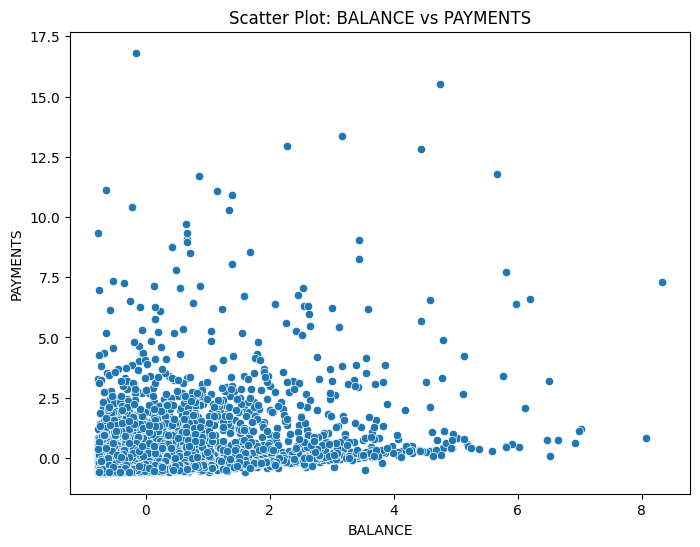

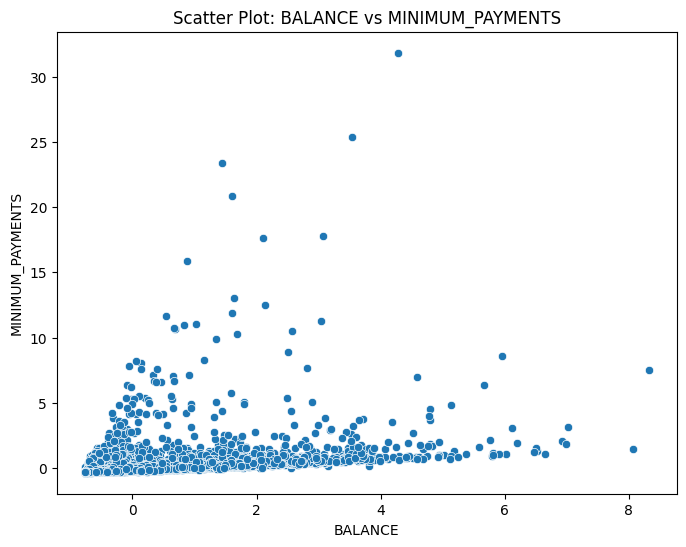

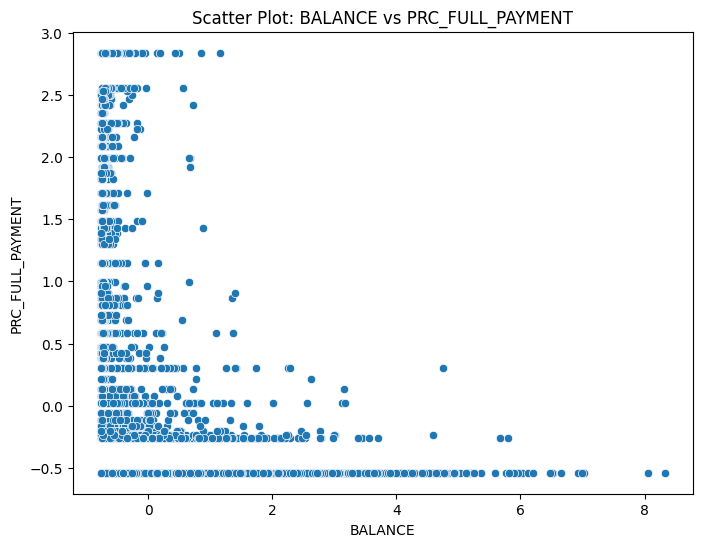

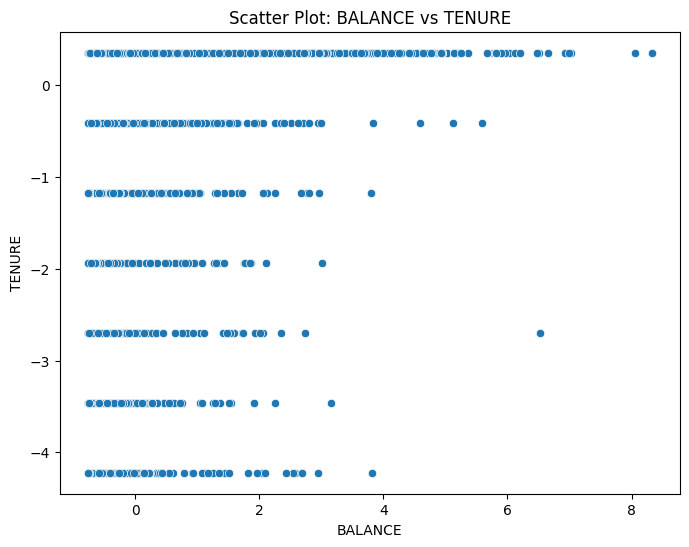

In [168]:

# List of columns to compare with 'BALANCE'
columns_to_compare = [
    'BALANCE_FREQUENCY',
    'PURCHASES',
    'ONEOFF_PURCHASES',
    'INSTALLMENTS_PURCHASES',
    'CASH_ADVANCE',
    'PURCHASES_FREQUENCY',
    'ONEOFF_PURCHASES_FREQUENCY',
    'PURCHASES_INSTALLMENTS_FREQUENCY',
    'CASH_ADVANCE_FREQUENCY',
    'CASH_ADVANCE_TRX',
    'PURCHASES_TRX',
    'CREDIT_LIMIT',
    'PAYMENTS',
    'MINIMUM_PAYMENTS',
    'PRC_FULL_PAYMENT',
    'TENURE'
]

for column in columns_to_compare:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x='BALANCE', y=column)
    plt.xlabel('BALANCE')
    plt.ylabel(column)
    plt.title(f'Scatter Plot: BALANCE vs {column}')
    plt.show()



#### Insights from the scatterplots

The overall distribution of the feature seems to be mixed with a general trend being that data is clustering towards the origin point of the X and y axis and fanning out as you go outwards. As this data seems to have multiple shapes, PCA can be used to reduce the varaince and capture the essense of the clusters.

The Balance comparison with Purchases show that a higher remaining bank balance does not mean that the shopper will buy more. Customers with moderate bank balances purchase more than those with higher balance.

Balance comparison with One-off Purchase shows that users with lower balance are more likely to get one-off purchases meaning maximum purchase but once.
Balance comparison with One-off Purchase Frequency show that generally One-off purchases are infrequent.

Balance comparison with Installment Purchases show that users with lower balance are more likely to make installment purchases.
Balance comparison with Installment Purchase Frequency shows that installment purchase are popular among users until user balance reaches 4 on the scale.

Balance comparison with Cash Advance shows that users are generally consistant with advance cash payment regardless of balance. It does peak a little when balance is around 2.
Balance comparison with Cash Advance Frequency shows that advance cash is being paid back more frequently when balance is lower.
Balance comparison with Cash Advance TRX shows that payment is being made with Cash Advance more frequently when balance is lower

Balance comparison with Credit Limit shows that users with higher balance have a higher credit limits. Users with low balances can have higher limits too  and this could be because these people are high/frequent spenders.

Balance comparison with Payments shows that users have low payment amounts when balance is low and shows a rising trend as balance increases.
Balance comparison with Minimum Payments shows the same trend as Payments.


# Clustering with PCA
PCA is being done as an EDA tool to reduce variance as there are multiple variables in this dataset many of which are related to or dependent in their derivation to each other.


Explained variance ratio: [2.72311770e-01 2.03743076e-01 8.91833372e-02 7.57360860e-02
 6.27661816e-02 5.71278613e-02 4.91618788e-02 4.21073427e-02
 3.68169669e-02 3.08150790e-02 2.36380362e-02 1.77453962e-02
 1.42671026e-02 1.17865972e-02 1.00809717e-02 2.71162672e-03
 6.90045972e-07]
Cumulative explained variance ratio: [0.27231177 0.47605485 0.56523818 0.64097427 0.70374045 0.76086831
 0.81003019 0.85213753 0.8889545  0.91976958 0.94340762 0.96115301
 0.97542011 0.98720671 0.99728768 0.99999931 1.        ]


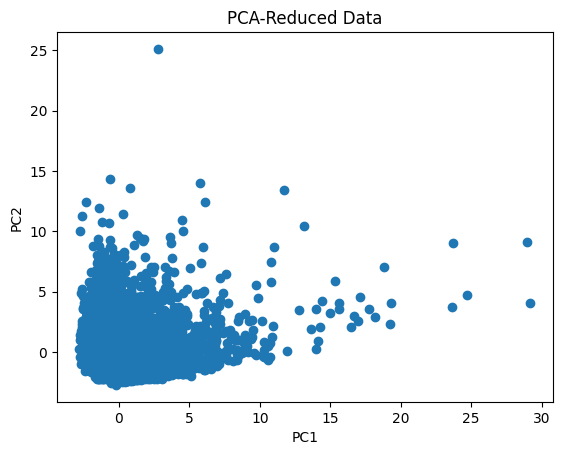

In [151]:
pca = PCA()
df_pca = pca.fit_transform(df)

# The transformed data is an array, convert it back into a dataframe
reduced_data = pd.DataFrame(df_pca, columns=[f'PC{i+1}' for i in range(df_pca.shape[1])])

# Print the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print('Explained variance ratio:', explained_variance_ratio)

# Print the cumulative explained variance ratio
cumulative_explained_variance = np.cumsum(explained_variance_ratio)
print('Cumulative explained variance ratio:', cumulative_explained_variance)

# Visualization of PCA-reduced data
plt.scatter(reduced_data['PC1'], reduced_data['PC2'])
plt.title("PCA-Reduced Data")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

Keep 12 components which explain 95% of the data

In [163]:
pca = PCA(n_components = 12)
df_pca2 = pca.fit_transform(df)

# The transformed data is an array, convert it back into a dataframe
reduced_data2 = pd.DataFrame(df_pca2)

c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` 

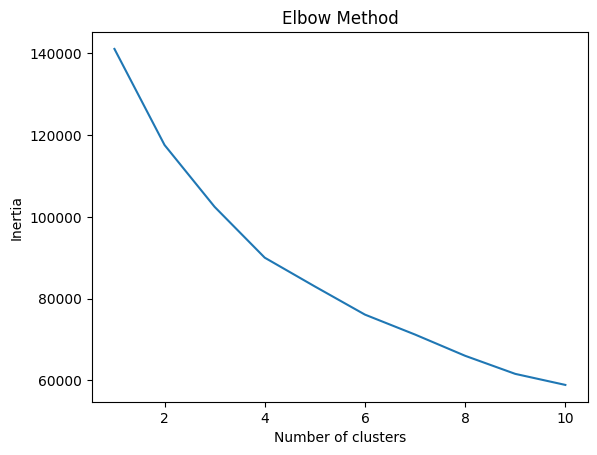

In [164]:
# Elbow Method for K-Means clustering
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(reduced_data2)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.2391181101938843


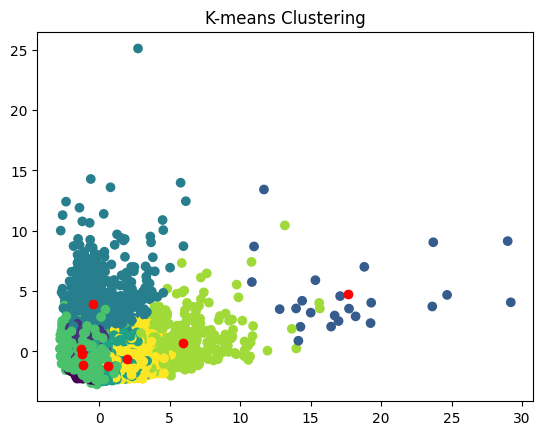

In [165]:
# K-Means clustering
kmeans = KMeans(n_clusters=8, random_state=0)
kmeans_clusters = kmeans.fit_predict(reduced_data2)
labels = kmeans.labels_
centers = kmeans.cluster_centers_

# Silhouette Score
sil_score = silhouette_score(reduced_data2, labels)
print(f"Silhouette Score: {sil_score}")

plt.scatter(reduced_data2.iloc[:, 0], reduced_data2.iloc[:, 1], c=labels)
plt.scatter(centers[:, 0], centers[:, 1], c='red')
plt.title('K-means Clustering')
plt.show()


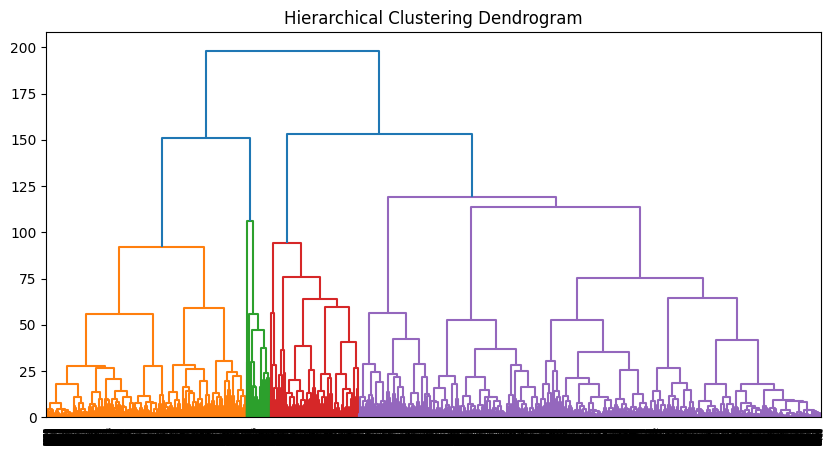

In [166]:
# Generate linkage matrix
Z = linkage(reduced_data2, method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


Affinity Propagation Silhouette Score: 0.13845192788802815


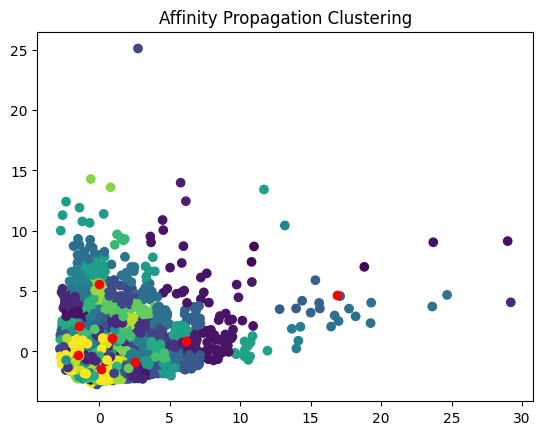

In [156]:

# Applying Affinity Propagation
af = AffinityPropagation(random_state=0)
af_labels = af.fit_predict(reduced_data2)

# Silhouette Score
af_sil_score = silhouette_score(reduced_data2, af_labels)
print(f"Affinity Propagation Silhouette Score: {af_sil_score}")

plt.scatter(reduced_data2.iloc[:, 0], reduced_data2.iloc[:, 1], c=af_labels)
plt.scatter(centers[:, 0], centers[:, 1], c='red')
plt.title('Affinity Propagation Clustering')
plt.show()




DBSCAN Silhouette Score: -0.4997476691329688


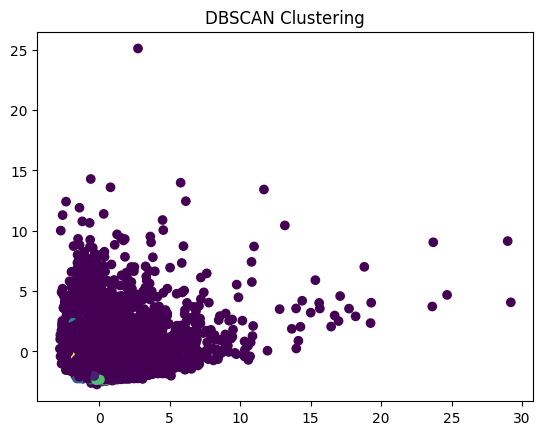

In [169]:
# Applying DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(reduced_data2)

# Silhouette Score
# Note: DBSCAN can result in noise data point with label -1
# Only include points that are part of a cluster
if len(set(dbscan_labels)) > 1:
    dbscan_sil_score = silhouette_score(reduced_data2, dbscan_labels)
    print(f"DBSCAN Silhouette Score: {dbscan_sil_score}")

# Plotting
plt.scatter(reduced_data2.iloc[:, 0], reduced_data2.iloc[:, 1], c=dbscan_labels)
plt.title('DBSCAN Clustering')
plt.show()

PCA reduces the variance and changes the shape of the overall distribution of the data to be centered around the origin point and fanning outwards as the scale increases. This graph, which is roughly spherical, is good for analysis using k-means.

The optimal number of n_components for the PCA were chosen through studying its Cumultaive Explained Variance. The CEV showed that 12 variables explain 95% of the data so k-means, DBSCAN, Hierarchical and Affinity Propagation is applied on the new reduced data.

The k-means number of clusters were determined through the Elbow method using enertia as the critera for number of cluster selection. The optimal number of clusters was 8 or 9 (little improvement in score when 9 are used) and the resulting silhouette score was 0.23 which is a moderate score.

The Affinity Propagation method gives the silhouette score of 0.13 and also makes 8 clusters.

DBSCAN however gives a score of -0.49 which is terrible and the number of clusters is not interpretable in the graph.

The hierarchical Clustering dendogram suggests 4 clusters which will result in very uneven groups. Generalization of some clusters into 1 cluster also means that each segment cannot be targetted effectively. 

#### As both k means and Affinity Propagation give 8 clusters and K-means has the best silhouette score it is now run without PCA to interpret the clusters ####

# Clustering Methods without PCA - Kmeans, Hierarchical, Affinity Propagation and DBSCAN

c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` 

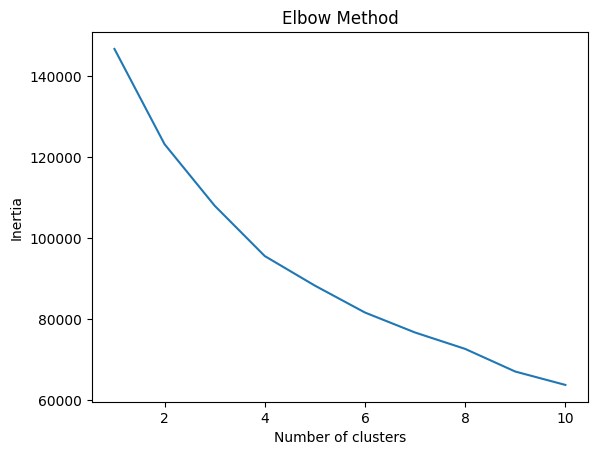

In [158]:
# Elbow Method for K-Means clustering
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.2321055489239505


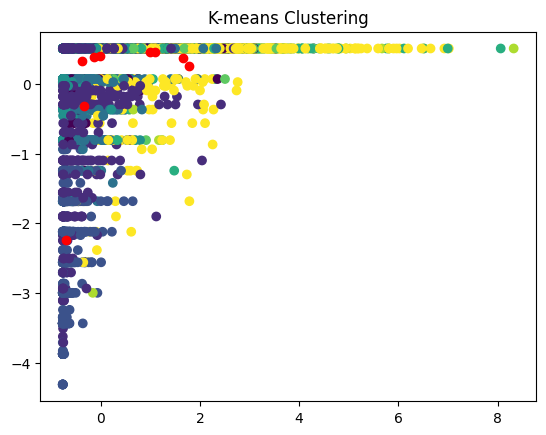

In [159]:
# K-Means clustering
kmeans = KMeans(n_clusters=9, random_state=0)
kmeans_clusters = kmeans.fit_predict(df)
labels = kmeans.labels_
centers = kmeans.cluster_centers_

# Silhouette Score
sil_score = silhouette_score(df, labels)
print(f"Silhouette Score: {sil_score}")

plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=labels)
plt.scatter(centers[:, 0], centers[:, 1], c='red')
plt.title('K-means Clustering')
plt.show()

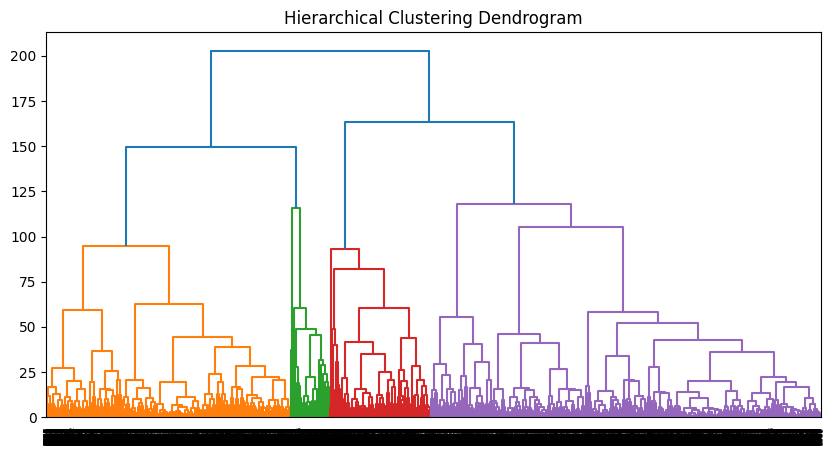

In [160]:

# Generate linkage matrix
Z = linkage(df, method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

Affinity Propagation Silhouette Score: 0.12277322278679115


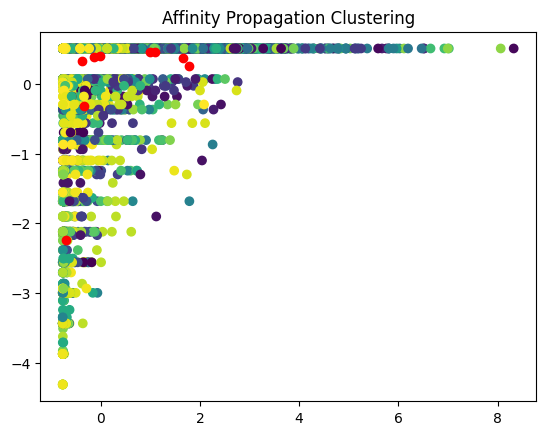

In [161]:
# Applying Affinity Propagation
af = AffinityPropagation(random_state=0)
af_labels = af.fit_predict(df)

# Silhouette Score
af_sil_score = silhouette_score(df, af_labels)
print(f"Affinity Propagation Silhouette Score: {af_sil_score}")

plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=af_labels)
plt.scatter(centers[:, 0], centers[:, 1], c='red')
plt.title('Affinity Propagation Clustering')
plt.show()

DBSCAN Silhouette Score: -0.465117752115066


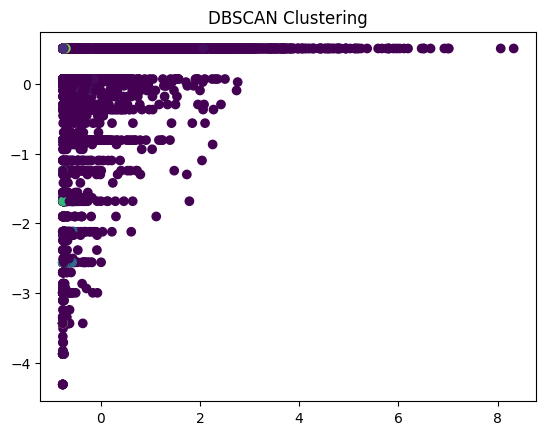

In [162]:
# Applying DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(df)

# Silhouette Score
# Note: DBSCAN can result in noise data point with label -1
# Only include points that are part of a cluster
if len(set(dbscan_labels)) > 1:
    dbscan_sil_score = silhouette_score(df, dbscan_labels)
    print(f"DBSCAN Silhouette Score: {dbscan_sil_score}")

# Plotting
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=dbscan_labels)
plt.title('DBSCAN Clustering')
plt.show()

As the analysis shows only minor decrease in the silhouette scores without PCA, it means that PCA does not help in creating much better clusters in this case.

# Interpreting Clusters
Kmeans had the best Silhouette score so cluster means from that are used to create a heatmap

In [177]:
df['cluster_labels'] = kmeans_clusters

# Calculate cluster means for numerical features
cluster_means = df.groupby('cluster_labels').mean()

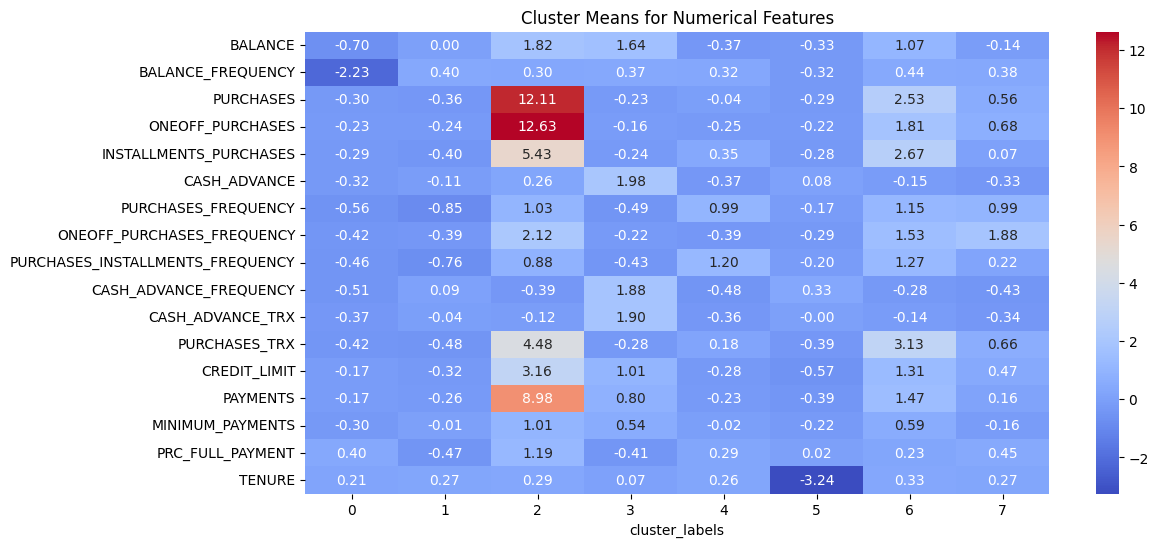

In [179]:
plt.figure(figsize=(12, 6))
sns.heatmap(cluster_means.T, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Cluster Means for Features')
plt.show()

#### Labelling clusters

1. Cluster 0 : Moderate Spenders

The cluster shows a generally balanced values for all fields though balance and balance frequency is a little low. The PRC_Full_Payment is high suggesting that a high percentage of full payments are made

2. Cluster 1: Infrequent Shoppers

This cluster shows low values for Purchase, Purchase Frequency, One-off Purchase Frequency and has a negative PRC_Full_Payment. They also have low credit limit so overall they do not purchase frequently.

3. Cluster 2: High/Frequent Spenders

This cluster shows high values for Purchases, One-Off Purchases, Installment Purchases, Payments, Minimum Payments, PRC_Full Payments and Purchases TRX. They have a high credit limit and a high balance.

4. Cluster 3: Cash Advance Users

They have high values in Cash Advance, Cash Advance Frequency and Cash Advance TRX. Purchase features are low meaning they arent making a lot of purchases. PRC_Full_Payment is negative so they are not making full payments regularly.

5. Cluster 4: Frequent Shoppers with Limit

This cluster has moderate Purchase, Installment Purchase and One-off purchase. Purchase Frequency and Installment Purchase Frequency is high. They have a moderate credit limit. 

6. Cluster 5: Less Active Users

This cluster performs low on all features except Cash Advance. Balance, Balance Frequency, Purchase, Installment Purchase and one-off purchase are low and they have the lowest credit limit.

7. Cluster 6: Reliable Payers

This cluster has good Balance with high Purchase, Installment Purchase and One-off purchase. Their Minimum Payments and frequency of purchases is also high. This cluster are active shoppers and have good credit limits.

8. Cluster 7: Regular Shoppers with Moderate Credit Limit

This cluster has good Purchase, Installment Purchase and One-off purchase are moderate. Purchase Frequency, One-Off Purchase Frequency and Installment Purchase Frequency are also good. Their Minimum payments are low. This means that they shop regularly but are not big spenders.



## Actionable Insight

Cluster 0: Need to encourage spending behavior. Provide personalized product recommendations and discounts to encourage spending. Reminder SMS and emails to keep them informed and reinforce buying behavior.

Cluster 1: Incentivize purchasing habits through first-time buyer discounts, return buyer discount etc. Retargeting ads to remind them of items in cart.

Cluster 2: Provide membership/loyalty cards with customized deals based on loyalty level. They can also be given credit card reward program. The best customers in this group can be given very personalized products/service.

Cluster 3: Send them reminders of any pending payments

Cluster 4: Frequent buyers card can be introduced with a point redeeming program. Encouraging saving by buying mentality can improve profitability from this group. Product recommendations can be made based on their past purchasing behavior.

Cluster 5: Offer discount on reactivating accounts or purchase after a lag. Targetted email, sms campaign to gain back their interest.

Cluster 6: Get feedback from these customers about which products they want to add or change to build the steady income stream. Provide further payment flexibility to these reliable payers.

Cluster 7: Personalized product recommendation to make the most out of these users purchase. Offer frequent buyer cards to encourage purchase. 